In [2]:
function my_bitstring(x::Float16)
    bit = bitstring(x)
    return string(bit[1],":", bit[2:6],":", bit[7:end])
end

function my_bitstring(x::Float32)
    bit = bitstring(x)
    return string(bit[1],":", bit[2:9],":", bit[10:end])
end

function my_bitstring(x::Float64)
    bit = bitstring(x)
    return string(bit[1],":", bit[2:12],":", bit[13:end])
end

my_bitstring (generic function with 3 methods)

In [5]:
function calculate_macheps(T) :T
    my_eps::T = 1.0
    while (T(1.0) + my_eps / T(2.0)) > T(1.0) 
        my_eps /= T(2.0)
    end
    return my_eps
end

function calculate_and_print_macheps(T)
    my_eps = calculate_macheps(T)
    println("Dla $(T): macheps wyliczony przez nas $(my_eps), rzeczywisty $(eps(T))")
    println("Bitowo nasza liczba: $(my_bitstring(my_eps))")
    println("Bitowo nasza liczba: $(my_bitstring(eps(T)))") 
end


calculate_and_print_macheps(Float16)
calculate_and_print_macheps(Float32)
calculate_and_print_macheps(Float64)

Dla Float16: macheps wyliczony przez nas 0.000977, rzeczywisty 0.000977
Bitowo nasza liczba: 0:00101:0000000000
Bitowo nasza liczba: 0:00101:0000000000
Dla Float32: macheps wyliczony przez nas 1.1920929e-7, rzeczywisty 1.1920929e-7
Bitowo nasza liczba: 0:01101000:00000000000000000000000
Bitowo nasza liczba: 0:01101000:00000000000000000000000
Dla Float64: macheps wyliczony przez nas 2.220446049250313e-16, rzeczywisty 2.220446049250313e-16
Bitowo nasza liczba: 0:01111001011:0000000000000000000000000000000000000000000000000000
Bitowo nasza liczba: 0:01111001011:0000000000000000000000000000000000000000000000000000


In [4]:
using Printf
function calculate_eta(T)
    my_eta::T = 1.0
    while (my_eta / T(2.0)) > T(0.0) 
        my_eta /= T(2.0)
    end
    println("Dla $(T): eta wyliczona przez nas $(my_eta), rzeczywisty $(nextfloat(T(0.0)))")
    println("Bitowo nasza liczba: $(my_bitstring(my_eta))")
    println("Bitowo nasza liczba: $(my_bitstring(nextfloat(T(0.0))))") 
end

calculate_eta(Float16)
calculate_eta(Float32)
calculate_eta(Float64)

Dla Float16: eta wyliczona przez nas 6.0e-8, rzeczywisty 6.0e-8
Bitowo nasza liczba: 0:00000:0000000001
Bitowo nasza liczba: 0:00000:0000000001
Dla Float32: eta wyliczona przez nas 1.0e-45, rzeczywisty 1.0e-45
Bitowo nasza liczba: 0:00000000:00000000000000000000001
Bitowo nasza liczba: 0:00000000:00000000000000000000001


Dla Float64: eta wyliczona przez nas 5.0e-324, rzeczywisty 5.0e-324
Bitowo nasza liczba: 0:00000000000:0000000000000000000000000000000000000000000000000001
Bitowo nasza liczba: 0:00000000000:0000000000000000000000000000000000000000000000000001


In [6]:
function calculate_max(T)
    my_max::T = 1.0
    while !isinf(my_max * T(2.0))       
        my_max *= T(2.0)
    end

    step = my_max / T(2.0)
    while !isinf(my_max + step)      
        my_max += step
        step /= T(2.0)
    end

    println("Dla $(T): max wyliczony przez nas $(my_max), rzeczywisty $(floatmax(T))")
    println("Bitowo nasza liczba: $(my_bitstring(my_max))")
    println("Bitowo nasza liczba: $(my_bitstring(floatmax(T)))")   
end

calculate_max(Float16)
calculate_max(Float32)
calculate_max(Float64)

Dla Float16: max wyliczony przez nas 6.55e4, rzeczywisty 6.55e4
Bitowo nasza liczba: 0:11110:1111111111
Bitowo nasza liczba: 0:11110:1111111111
Dla Float32: max wyliczony przez nas 3.4028235e38, rzeczywisty 3.4028235e38
Bitowo nasza liczba: 0:11111110:11111111111111111111111
Bitowo nasza liczba: 0:11111110:11111111111111111111111
Dla Float64: max wyliczony przez nas 1.7976931348623157e308, rzeczywisty 1.7976931348623157e308
Bitowo nasza liczba: 0:11111111110:1111111111111111111111111111111111111111111111111111
Bitowo nasza liczba: 0:11111111110:1111111111111111111111111111111111111111111111111111


In [1]:
f(x) = √(x^2 + 1) - 1
g(x) = x^2/(√(x^2 + 1) + 1)

diff(x) = abs(f(x) - g(x))

diff (generic function with 1 method)

In [143]:
n = 50
data_x = []
data_f = []
data_g = []
for i in 1:n
    push!(data_x, "8^(-$i)")
    push!(data_f, f(8.0^(-i)))
    push!(data_g, g(8.0^(-i)))
end

In [145]:
using Printf
h(data) = map(x -> begin
    replace(@sprintf("%.8e", x), r"e\+00" => "", r"e([+-]?\d+)" => s" dot 10^(\1)")
end, data)

h (generic function with 1 method)

In [146]:
h_f = h(data_f)
h_g = h(data_g)

for i in 1:n
    println("\$$(data_x[i])\$, \$$(h_f[i])\$, \$$(h_g[i])\$,")
end

$8^(-1)$, $7.78221854 dot 10^(-03)$, $7.78221854 dot 10^(-03)$,
$8^(-2)$, $1.22062863 dot 10^(-04)$, $1.22062863 dot 10^(-04)$,
$8^(-3)$, $1.90734681 dot 10^(-06)$, $1.90734681 dot 10^(-06)$,
$8^(-4)$, $2.98023219 dot 10^(-08)$, $2.98023219 dot 10^(-08)$,
$8^(-5)$, $4.65661287 dot 10^(-10)$, $4.65661287 dot 10^(-10)$,
$8^(-6)$, $7.27595761 dot 10^(-12)$, $7.27595761 dot 10^(-12)$,
$8^(-7)$, $1.13686838 dot 10^(-13)$, $1.13686838 dot 10^(-13)$,
$8^(-8)$, $1.77635684 dot 10^(-15)$, $1.77635684 dot 10^(-15)$,
$8^(-9)$, $0.00000000$, $2.77555756 dot 10^(-17)$,
$8^(-10)$, $0.00000000$, $4.33680869 dot 10^(-19)$,
$8^(-11)$, $0.00000000$, $6.77626358 dot 10^(-21)$,
$8^(-12)$, $0.00000000$, $1.05879118 dot 10^(-22)$,
$8^(-13)$, $0.00000000$, $1.65436123 dot 10^(-24)$,
$8^(-14)$, $0.00000000$, $2.58493941 dot 10^(-26)$,
$8^(-15)$, $0.00000000$, $4.03896783 dot 10^(-28)$,
$8^(-16)$, $0.00000000$, $6.31088724 dot 10^(-30)$,
$8^(-17)$, $0.00000000$, $9.86076132 dot 10^(-32)$,
$8^(-18)$, $0.0000000

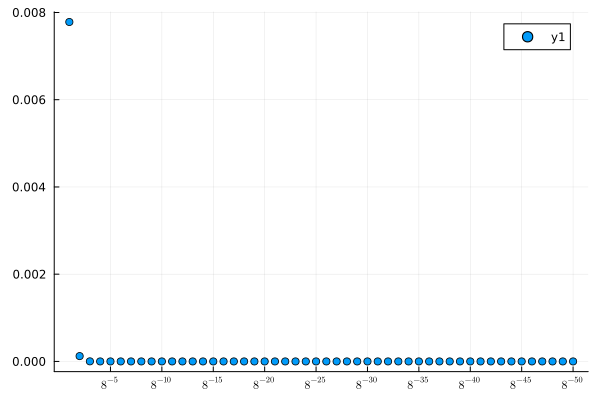

In [89]:
using Plots
using LaTeXStrings

plot(data_x, [data_g], seriestype=:scatter, yscale=:log10)
plot(data_x, [data_f], seriestype=:scatter)

In [11]:
x = [2.718281828, -3.141592654, 1.414213562, 0.5772156649, 0.3010299957]
y = [1486.2497, 878366.9879, -22.37492, 4773714.647, 0.000185049]



forward = 0
for i in 1:5
    forward += x[i]*y[i]
end
println("Do przodu: $(forward)")

backwards = 0
for i in reverse(1:5)
    backwards += x[i]*y[i]
end
println("Do tyłu: $(backwards)")

Do przodu: 1.0251881368296672e-10


Do tyłu: -1.5643308870494366e-10


In [14]:
multiplied = x .* y

5-element Vector{Float64}:
 4040.045551380452
   -2.7594712767027467e6
  -31.64291531266504
    2.7554628740109736e6
    5.57052996742893e-5

In [20]:
mult = x .* y

println(mult)

forward = mult[1] + mult[2] + mult[3] + mult[4] + mult[5]
backward = mult[5] + mult[4] + mult[3] + mult[2] + mult[1]
great_to_low = (mult[4] + mult[1] + mult[5]) + (mult[2] + mult[3])
low_to_great = (mult[5] + mult[1] + mult[4]) + (mult[3] + mult[2])

println("Do przodu $(forward)")
println("Do tyłu $(backward)")
println("Najw do najmn $(great_to_low)")
println("Najmn do najw $(low_to_great)")
println("Prawdziwy -1.00657107000000 e-11")

[4040.045551380452, -2.7594712767027467e6, -31.64291531266504, 2.7554628740109736e6, 5.57052996742893e-5]
Do przodu 1.0251881368296672e-10
Do tyłu -1.5643308870494366e-10
Najw do najmn 0.0
Najmn do najw 0.0
Prawdziwy -1.00657107000000 e-11


In [185]:
x = 1.0
i = 0

while x * (1.0 / x) == 1.0
    x += 2^(-52)
    i += 1
end

In [190]:

using Printf
println("$(@sprintf("%.100f", x)) $(x * (1.0/x))")
println(my_bitstring(x))
println(my_bitstring(1.0 / x))
println(i)

1.0000000572289970968142824858659878373146057128906250000000000000000000000000000000000000000000000000 0.9999999999999999
0:01111111111:0000000000000000000000001111010111001011111100101010
0:01111111110:1111111111111111111111100001010001101000000111001001
257736490


In [1]:
d = cos(1) - 3sin(3)

0.11694228168853815

In [2]:
approx_d(f,x,h) = (f(x + h) - f(x))/h 
f(x) = sin(x) + cos(3x)

f (generic function with 1 method)

In [3]:
data_n = []
data_app = []
data_diff = []

for n in 0:54
    
    H = 2.0^(-n)
    a_d = approx_d(f, 1.0, H)
    dif = abs(d - a_d)
    #println("$(n), $(a_d - d), $(1.0/H), $((abs(d) + abs(a_d))/dif), $(1.0/H * (abs(d) + abs(a_d))/dif)")
    #println("$(n), $(a_d - d), $(1 - min(a_d,d)/max(a_d,d)), $(log2(1 - min(a_d,d)/max(a_d,d)))")
    println("n: $(n), wartość: $(a_d), błąd: $(dif)")
    push!(data_n, n)
    push!(data_app, a_d)
    push!(data_diff, dif)
end

n: 0, wartość: 2.0179892252685967, błąd: 16.256284007210247
n: 1, wartość: 1.8704413979316472, błąd: 14.994569038026341
n: 2, wartość: 1.1077870952342974, błąd: 8.472938951069525
n: 3, wartość: 0.6232412792975817, błąd: 4.3294776730756
n: 4, wartość: 0.3704000662035192, błąd: 2.1673750576377127
n: 5, wartość: 0.24344307439754687, błąd: 1.0817369977945916
n: 6, wartość: 0.18009756330732785, błąd: 0.5400551511984029
n: 7, wartość: 0.1484913953710958, błąd: 0.26978363366113334
n: 8, wartość: 0.1327091142805159, błąd: 0.1348257650211652
n: 9, wartość: 0.1248236929407085, błąd: 0.06739573692568737
n: 10, wartość: 0.12088247681106168, błąd: 0.033693503030988975
n: 11, wartość: 0.11891225046883847, błąd: 0.01684565028025612
n: 12, wartość: 0.11792723373901026, błąd: 0.008422548596199042
n: 13, wartość: 0.11743474961076572, błąd: 0.004211205007434336
n: 14, wartość: 0.11718851362093119, błąd: 0.0021055851556654823
n: 15, wartość: 0.11706539714577957, błąd: 0.001052788225642131
n: 16, wartość: 

In [205]:
using Plots
using LaTeXStrings

plot(data_n, data_app, seriestype=:scatter, legend_position=false)
xlabel!(L"n")
ylabel!(L"\tilde{f}'(x_0)")
savefig("plot_f.svg")

"/home/dawiderter/Projects/Studies/scientific_computing/lista_1/plot_f.svg"

In [206]:
plot(data_n, data_diff, seriestype=:scatter, yscale=:log10, legend_position=false)
xlabel!(L"n")
ylabel!(L"|f'(x_0) - \tilde{f}'(x_0)|")
savefig("plot_diff.svg")

"/home/dawiderter/Projects/Studies/scientific_computing/lista_1/plot_diff.svg"